In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16, 9]

In [201]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
filename = "titanic.csv"

In [202]:
try:
    titanic = pd.read_csv(filename)
except FileNotFoundError:
    titanic = pd.read_csv(url)

In [203]:
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [204]:
males = titanic[titanic['Sex']=='male']
males

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
...,...,...,...,...,...,...,...,...
879,0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.5000
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [205]:
males_total = males.groupby('Pclass')['Survived'].aggregate('count')
males_total

Pclass
1    122
2    108
3    343
Name: Survived, dtype: int64

In [206]:
male_survivors= males.groupby('Pclass')['Survived'].aggregate('sum')
male_survivors

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [207]:
male_surv_rate = male_survivors / males_total
male_surv_rate

Pclass
1    0.368852
2    0.157407
3    0.137026
Name: Survived, dtype: float64

In [208]:
females = titanic[titanic['Sex']=='female']
females

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
...,...,...,...,...,...,...,...,...
876,1,2,Mrs. William (Imanita Parrish Hall) Shelley,female,25.0,0,1,26.0000
878,0,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000


In [209]:
females_total = females.groupby('Pclass')['Survived'].aggregate('count')
females_total

Pclass
1     94
2     76
3    144
Name: Survived, dtype: int64

In [210]:
female_survivors = females.groupby('Pclass')['Survived'].aggregate('sum')
female_survivors

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

In [211]:
female_surv_rate = female_survivors / females_total
female_surv_rate

Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64

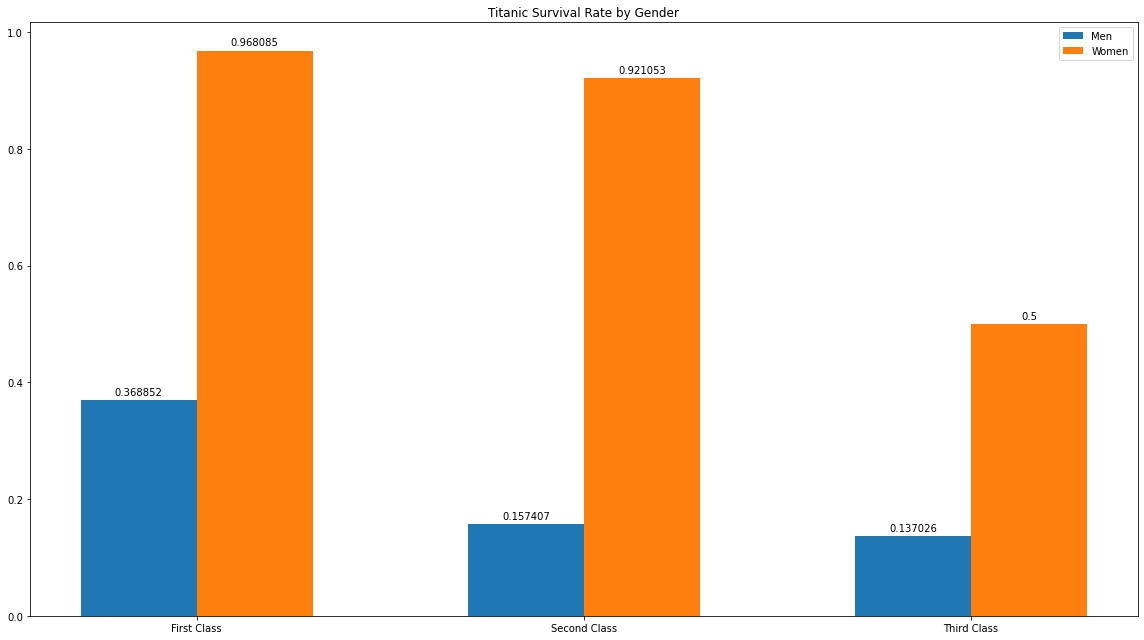

In [213]:
labels = ['First Class', 'Second Class', 'Third Class']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_surv_rate, width, label='Men')
rects2 = ax.bar(x + width/2, female_surv_rate, width, label='Women')

ax.set_title('Titanic Survival Rate by Gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()